<a href="https://colab.research.google.com/github/mohsenSarvariHero/statistics/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-Can age and BMI together serve as reliable predictors for diagnosing type 2
diabetes?


In [3]:
import pandas as pd

# Load the dataset
file_path = "dataset1csv.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ID                                            2535 non-null   int64  
 1   Sex                                           2535 non-null   object 
 2   Age                                           2525 non-null   float64
 3   History of high blood pressure                2535 non-null   object 
 4   History of use drugs for high blood pressure  2535 non-null   object 
 5   Systolic blood pressure                       2535 non-null   int64  
 6   Diastolic blood pressure                      2535 non-null   int64  
 7   Height                                        2535 non-null   float64
 8   Weight                                        2535 non-null   float64
 9   BMI                                           2535 non-null   f

(None,
            ID     Sex   Age History of high blood pressure  \
 0  1375903004  Female  30.0                             No   
 1  5679786516  Female  30.0                             No   
 2  1377427821  Female  30.0                             No   
 3  1372986472  Female  31.0                             No   
 4  1374079650  Female  31.0                             No   
 
   History of use drugs for high blood pressure  Systolic blood pressure  \
 0                                           No                      100   
 1                                           No                      125   
 2                                           No                      120   
 3                                           No                      120   
 4                                           No                      120   
 
    Diastolic blood pressure  Height  Weight        BMI  ...  \
 0                        60   150.0    65.0  28.888889  ...   
 1                        8

In [6]:
import pandas as pd

# Load the dataset (update 'dataset1csv.csv' with your actual file path if needed)
df = pd.read_csv("dataset1csv.csv")

# Drop rows with missing Age values
df_clean = df.dropna(subset=["Age"])

# Convert 'Result of diabetes screening' to binary (1: Positive, 0: Negative & Old patient)
df_clean["Diabetes"] = df_clean["Result of diabetes screening"].apply(lambda x: 1 if x == "Positive" else 0)

# Check if df_clean is correctly defined
print(df_clean.head())


           ID     Sex   Age History of high blood pressure  \
0  1375903004  Female  30.0                             No   
1  5679786516  Female  30.0                             No   
2  1377427821  Female  30.0                             No   
3  1372986472  Female  31.0                             No   
4  1374079650  Female  31.0                             No   

  History of use drugs for high blood pressure  Systolic blood pressure  \
0                                           No                      100   
1                                           No                      125   
2                                           No                      120   
3                                           No                      120   
4                                           No                      120   

   Diastolic blood pressure  Height  Weight        BMI  ...  \
0                        60   150.0    65.0  28.888889  ...   
1                        85   145.5    61.5  29.05

<ipython-input-6-67cb7c81bf89>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["Diabetes"] = df_clean["Result of diabetes screening"].apply(lambda x: 1 if x == "Positive" else 0)


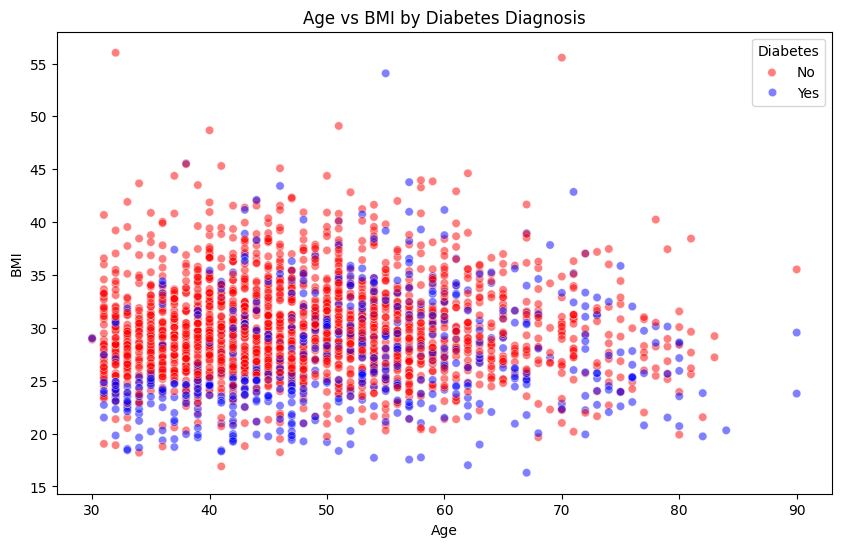

,Age,BMI,Diabetes
Age,1.000000,0.029361,-0.140601
BMI,0.029361,1.000000,0.219889
Diabetes,-0.140601,0.219889,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df_clean[["Age", "BMI", "Diabetes"]].corr()

# Scatter plot: Age vs BMI by Diabetes Diagnosis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="Age", y="BMI", hue="Diabetes", alpha=0.5, palette={0: "blue", 1: "red"})
plt.title("Age vs BMI by Diabetes Diagnosis")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.show()

# Display correlation values
correlation_matrix


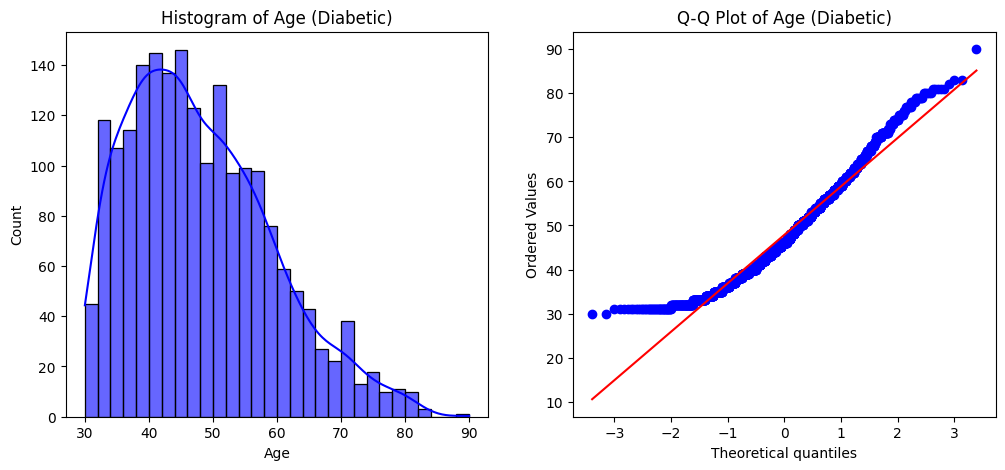

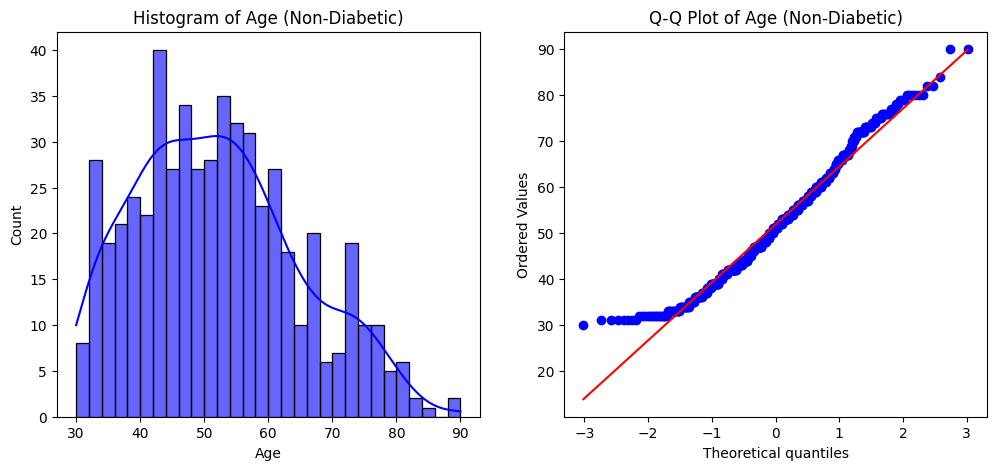

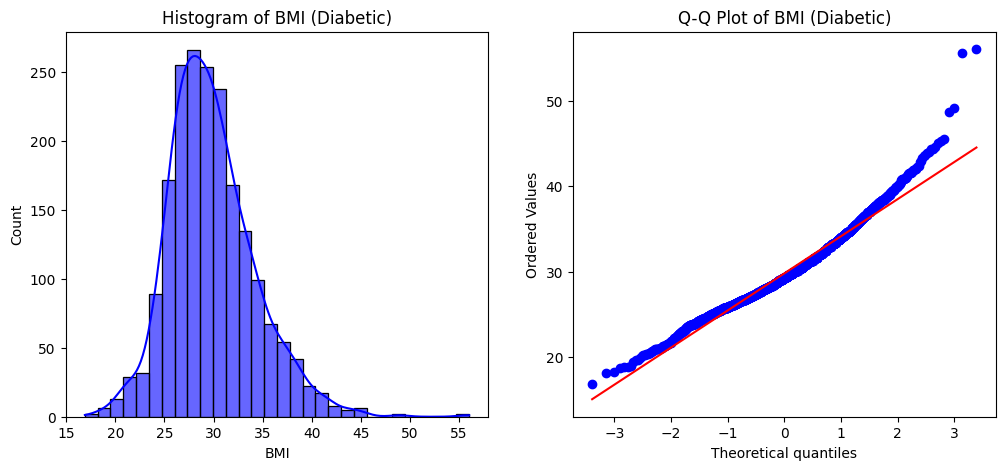

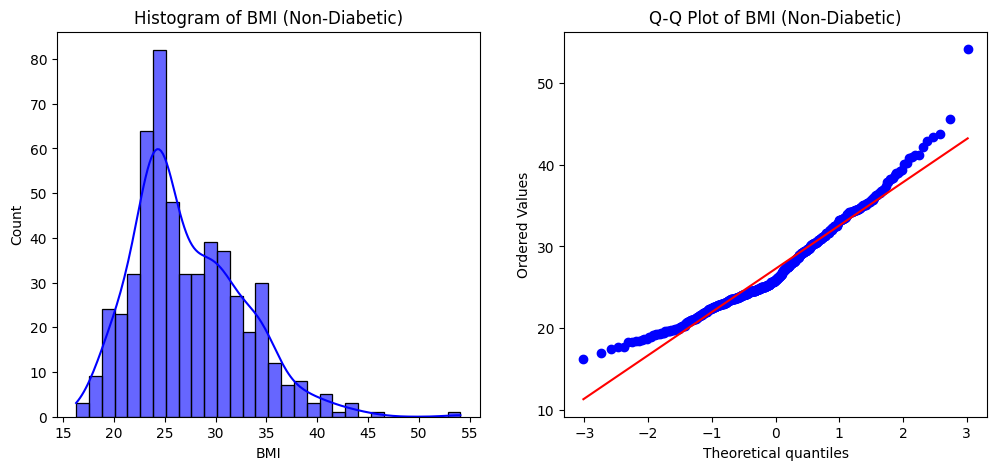

In [10]:
#ckeck normality
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function to plot histogram and Q-Q plot
def normality_plots(data, feature, group_label):
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, bins=30, color="blue", alpha=0.6)
    plt.title(f"Histogram of {feature} ({group_label})")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {feature} ({group_label})")

    plt.show()

# Plot for Age (Diabetic & Non-Diabetic)
normality_plots(diabetic_group, "Age", "Diabetic")
normality_plots(non_diabetic_group, "Age", "Non-Diabetic")

# Plot for BMI (Diabetic & Non-Diabetic)
normality_plots(diabetic_group, "BMI", "Diabetic")
normality_plots(non_diabetic_group, "BMI", "Non-Diabetic")


In [11]:
from scipy.stats import shapiro, ks_1samp

# Shapiro-Wilk Test (recommended for small-medium datasets)
shapiro_age_diabetic = shapiro(diabetic_group["Age"])
shapiro_age_non_diabetic = shapiro(non_diabetic_group["Age"])
shapiro_bmi_diabetic = shapiro(diabetic_group["BMI"])
shapiro_bmi_non_diabetic = shapiro(non_diabetic_group["BMI"])

# Display results
print("Shapiro-Wilk Test for Normality:")
print("Age (Diabetic):", shapiro_age_diabetic)
print("Age (Non-Diabetic):", shapiro_age_non_diabetic)
print("BMI (Diabetic):", shapiro_bmi_diabetic)
print("BMI (Non-Diabetic):", shapiro_bmi_non_diabetic)

# Kolmogorov-Smirnov Test (alternative for large datasets)
ks_age_diabetic = ks_1samp(diabetic_group["Age"], stats.norm.cdf)
ks_age_non_diabetic = ks_1samp(non_diabetic_group["Age"], stats.norm.cdf)
ks_bmi_diabetic = ks_1samp(diabetic_group["BMI"], stats.norm.cdf)
ks_bmi_non_diabetic = ks_1samp(non_diabetic_group["BMI"], stats.norm.cdf)

print("\nKolmogorov-Smirnov Test for Normality:")
print("Age (Diabetic):", ks_age_diabetic)
print("Age (Non-Diabetic):", ks_age_non_diabetic)
print("BMI (Diabetic):", ks_bmi_diabetic)
print("BMI (Non-Diabetic):", ks_bmi_non_diabetic)


Shapiro-Wilk Test for Normality:
Age (Diabetic): ShapiroResult(statistic=0.9586760780413708, pvalue=2.6043170003641782e-23)
Age (Non-Diabetic): ShapiroResult(statistic=0.9731308164778939, pvalue=2.047749927039656e-08)
BMI (Diabetic): ShapiroResult(statistic=0.9692294560829151, pvalue=3.499217236738871e-20)
BMI (Non-Diabetic): ShapiroResult(statistic=0.9599914271222252, pvalue=5.6987201300868797e-11)

Kolmogorov-Smirnov Test for Normality:
Age (Diabetic): KstestResult(statistic=1.0, pvalue=0.0, statistic_location=30.0, statistic_sign=-1)
Age (Non-Diabetic): KstestResult(statistic=1.0, pvalue=0.0, statistic_location=30.0, statistic_sign=-1)
BMI (Diabetic): KstestResult(statistic=1.0, pvalue=0.0, statistic_location=16.89623508, statistic_sign=-1)
BMI (Non-Diabetic): KstestResult(statistic=1.0, pvalue=0.0, statistic_location=16.29818594, statistic_sign=-1)


In [17]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Load dataset
df = pd.read_csv('dataset1csv.csv')

# Ensure 'Diabetes' column is created
df.loc[:, "Diabetes"] = df["Result of diabetes screening"].apply(lambda x: 1 if x == "Positive" else 0)

# Convert necessary columns to numeric, handling errors
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')

# Drop rows with missing values in relevant columns
df = df[['Age', 'BMI', 'Diabetes']].dropna()

# Mann-Whitney U test for Age
diabetic = df[df['Diabetes'] == 1]['Age']
non_diabetic = df[df['Diabetes'] == 0]['Age']
if not diabetic.empty and not non_diabetic.empty:
    mann_whitney_age = stats.mannwhitneyu(diabetic, non_diabetic, alternative='two-sided')
    print("Mann-Whitney U test for Age:", mann_whitney_age)
else:
    print("Mann-Whitney U test for Age: Not enough data")

# Mann-Whitney U test for BMI
diabetic_bmi = df[df['Diabetes'] == 1]['BMI']
non_diabetic_bmi = df[df['Diabetes'] == 0]['BMI']
if not diabetic_bmi.empty and not non_diabetic_bmi.empty:
    mann_whitney_bmi = stats.mannwhitneyu(diabetic_bmi, non_diabetic_bmi, alternative='two-sided')
    print("Mann-Whitney U test for BMI:", mann_whitney_bmi)
else:
    print("Mann-Whitney U test for BMI: Not enough data")

# Logistic Regression
X = df[['Age', 'BMI']]
X = sm.add_constant(X)  # Add intercept
y = df['Diabetes']

# Remove NaN and infinite values from X
i = X.replace([np.inf, -np.inf], np.nan).dropna().index
y = y.loc[i]
X = X.loc[i]

if not X.empty and not y.empty:
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
else:
    print("Logistic Regression: Not enough data")

# Spearman’s rank correlation
if df['Age'].notna().sum() > 1 and df['BMI'].notna().sum() > 1:
    spearman_age_bmi = stats.spearmanr(df['Age'], df['BMI'])
    print("Spearman correlation between Age and BMI:", spearman_age_bmi)
else:
    print("Spearman correlation between Age and BMI: Not enough data")

if df['Age'].notna().sum() > 1 and df['Diabetes'].notna().sum() > 1:
    spearman_age_diabetes = stats.spearmanr(df['Age'], df['Diabetes'])
    print("Spearman correlation between Age and Diabetes:", spearman_age_diabetes)
else:
    print("Spearman correlation between Age and Diabetes: Not enough data")

if df['BMI'].notna().sum() > 1 and df['Diabetes'].notna().sum() > 1:
    spearman_bmi_diabetes = stats.spearmanr(df['BMI'], df['Diabetes'])
    print("Spearman correlation between BMI and Diabetes:", spearman_bmi_diabetes)
else:
    print("Spearman correlation between BMI and Diabetes: Not enough data")

Mann-Whitney U test for Age: MannwhitneyuResult(statistic=439276.0, pvalue=6.775868096069898e-11)
Mann-Whitney U test for BMI: MannwhitneyuResult(statistic=712699.5, pvalue=2.165323821522892e-31)
Optimization terminated successfully.
         Current function value: 0.482986
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                 2525
Model:                          Logit   Df Residuals:                     2522
Method:                           MLE   Df Model:                            2
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                 0.07128
Time:                        14:20:28   Log-Likelihood:                -1219.5
converged:                       True   LL-Null:                       -1313.1
Covariance Type:            nonrobust   LLR p-value:                 2.228e-41
                 coef    std err          z      P>|z|      [0.025    

2- How does the imbalance in the dataset and the inclusion of systolic and diastolic
blood pressure as predictors impact the performance of various classification
techniques in diagnosing type 2 diabetes?
